In [1]:
##PCA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA


(200, 16, 16)


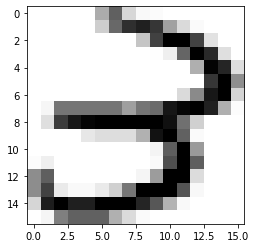

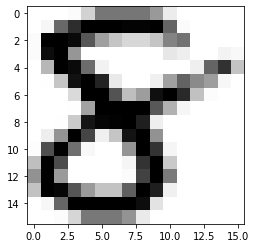

In [9]:
#TASK 1
data_three_pd=pd.read_csv('three.txt', sep=' ', header=None)
data_eight_pd=pd.read_csv('eight.txt', sep=' ', header=None)


data_three_pd = data_three_pd.to_numpy()
data_three_pd = data_three_pd[:,:-1]
data_three = np.reshape(data_three_pd,(200,16,16))
print(data_three.shape)

data_eight_pd = data_eight_pd.to_numpy()
data_eight_pd = data_eight_pd[:,:-1]
data_eight = np.reshape(data_eight_pd,(200,16,16))

vizualizeForThree = data_three[0,:,:]
vizualizeForEight = data_eight[0,:,:]


plt.imshow(vizualizeForThree.T, cmap='Greys')
plt.show()
plt.imshow(vizualizeForEight.T, cmap='Greys')
plt.show()


(400, 256)


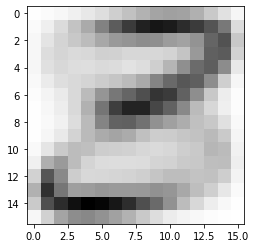

(256,)


In [10]:
#Task 2
data = np.stack((data_three_pd, data_eight_pd), axis = 0).reshape((400,256))
print(data.shape)
mean_data = np.mean(data, axis=0)
plt.imshow(mean_data.reshape((16,16)).T, cmap='Greys')
plt.show()
print(mean_data.shape)


In [12]:
#Task3
data_centered = data - mean_data
N = data_centered.shape[0]
cov = (data_centered.T @ data_centered)/(N-1)
sub_cov = cov[:5,:5]
print('sub_cov', sub_cov)

sub_cov [[  59.16729323  142.14943609   28.68201754   -7.17857143  -14.3358396 ]
 [ 142.14943609  878.93879073  374.13731203   24.12778195  -87.12781955]
 [  28.68201754  374.13731203 1082.9058584   555.2268797    33.72431078]
 [  -7.17857143   24.12778195  555.2268797  1181.24408521  777.77192982]
 [ -14.3358396   -87.12781955   33.72431078  777.77192982 1429.95989975]]


In [13]:
##TASK4
eigen_values, eigen_vectors = LA.eig(cov)
print(eigen_values.shape, eigen_vectors.shape)


(256,) (256, 256)


lambda1 237155.2462904853
lambda2 145188.3526868256
(2, 256)


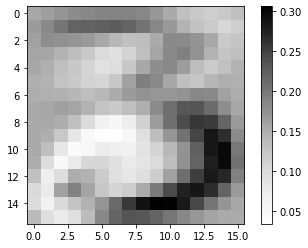

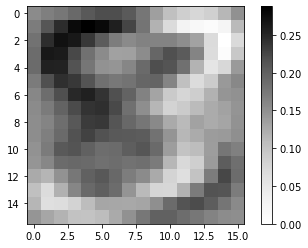

In [14]:
lambda1 = (np.argmax(eigen_values))
lambda2 = (eigen_values.argsort()[-2])

eigV1 = eigen_values[lambda1]
eigV2 = eigen_values[lambda2]

print('lambda1', eigV1)
print('lambda2', eigV2)

#zi = (xi – min(x)) / (max(x) – min(x))
e1 = eigen_vectors[:,lambda1].reshape((16,16))
e2 = eigen_vectors[:,lambda2].reshape((16,16))
eigen_stacked=np.vstack([eigen_vectors[:,lambda1], eigen_vectors[:,lambda2]])
print(eigen_stacked.shape)

min_e = np.min(eigen_stacked)
max_e = np.max(eigen_stacked)

e1_dash = (e1 - min_e) * (1.0/(max_e - min_e) * 255.0).astype('uint8')/255
e2_dash = (e2 - min_e) * (1.0/(max_e - min_e) * 255.0).astype('uint8')/255
plt.imshow(e1_dash.T,cmap='Greys')
plt.colorbar()
plt.show()

plt.imshow(e2_dash.T,cmap='Greys')
plt.colorbar()
plt.show()



In [15]:
#TASK5
projections = data_centered @ eigen_stacked.T
print(projections.shape)
print('Three', 'x', projections[0,0], 'y', projections[0,1])
print('Eight', 'x', projections[200,0], 'y', projections[200,1])


(400, 2)
Three x 136.20872783819004 y -242.6284802801652
Eight x -312.6870279186347 y 649.573460858431


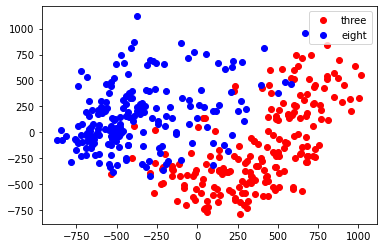

In [23]:
#TASK6
plt.plot(projections[:200,0],projections[:200,1], 'ro', label='three')
plt.plot(projections[200:,0],projections[200:,1], 'bo', label='eight')
plt.legend()
plt.show()